In [1]:
import os
import numpy as np
from scipy.stats import kendalltau
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

from helpers import *
from visualization import *
from redundancy import *
from relevance import *
from preprocessing import *
from datasets import *
from models import *

from config import *
from config_models import *

torch.manual_seed(42)
cuda = torch.device('cuda:1')

In [2]:
DATASET_ID_TRAIN = DATASET_IDS[0]
DATASET_ID_TEST = DATASET_IDS[1]
BASE_DATA_DIR = '/scratch/korunosk/data'
EMBEDDINGS_DIR = os.path.join(BASE_DATA_DIR, 'BERT_sent')

In [3]:
tuples_data = []
for topic_id in TOPIC_IDS[DATASET_ID_TRAIN]:
    tuples_data.extend(make_tuples_data_for_regression(EMBEDDINGS_DIR, DATASET_ID_TRAIN, topic_id))
tuples_data = np.array(tuples_data)

tuples_train_regression, tuples_val_regression = stratified_sampling(tuples_data)

tuples_train_regression.shape, tuples_val_regression.shape

((2082, 3), (893, 3))

In [4]:
tuples_data = []
for topic_id in TOPIC_IDS[DATASET_ID_TRAIN]:
    tuples_data.extend(make_tuples_data_for_classification(EMBEDDINGS_DIR, DATASET_ID_TRAIN, topic_id))
tuples_data = np.array(tuples_data)

tuples_train_classification, tuples_test_classification = stratified_sampling(tuples_data)

tuples_train_classification.shape, tuples_test_classification.shape

((126989, 4), (54425, 4))

Train Loss: 0.0024
Train Loss: 0.1971
Train Loss: 0.0114
Train Loss: 0.0581
Train Loss: 0.1665
Train Loss: 0.0876
Train Loss: 0.0784
Train Loss: 0.0666
Train Loss: 0.0000
Train Loss: 0.0581
Train Loss: 0.0458
Train Loss: 0.1840
Train Loss: 0.1005
Train Loss: 0.2007
Train Loss: 0.0600
Train Loss: 0.1170
Train Loss: 0.1109
Train Loss: 0.0310
Train Loss: 0.2352
Train Loss: 0.0000
Train Loss: 0.1024


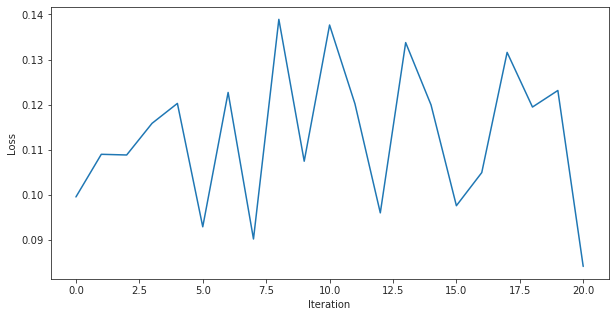

In [5]:
config = CONFIG_MODELS['TransformSinkhornRegModel']

transform = transforms.Compose([Normalize(), ToTensor()])
dataset = TACDatasetRegression(BASE_DATA_DIR, EMBEDDINGS_DIR, DATASET_ID_TRAIN, tuples_train_regression)
data_loader = DataLoader(dataset, batch_size=config['batch_size'], collate_fn=lambda x: x)

transform_sinkhorn_reg_model = TransformSinkhornRegModel(config).to(device=cuda)

criterion = nn.MSELoss()
optimizer = optim.SGD(transform_sinkhorn_reg_model.parameters(), lr=config['learning_rate'])

loss = []

optimizer.zero_grad()

for batch in data_loader:
    
    for sample in batch:
        (d, s), y = transform(sample)

        y_hat = transform_sinkhorn_reg_model(d.to(device=cuda),
                                             s.to(device=cuda))
        
        L = criterion(y_hat, y.to(device=cuda))
        
        L.backward()
        
        loss.append(L.item())
        
    optimizer.step()
    
    optimizer.zero_grad()
    
    print(f'Train Loss: {loss[-1]:.4f}')

transform_sinkhorn_reg_model.save('transform_sinkhorn_reg_model.pt')

n = config['batch_size']
loss = [sum(loss[i:i+n])/n for i in range(0,len(loss),n)]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plot_loss(ax, loss)
plt.show()

Train Loss: 12.1449
Train Loss: 0.0416
Train Loss: 27.6310
Train Loss: 0.0000
Train Loss: 35.9638
Train Loss: 7.9380
Train Loss: 27.6310
Train Loss: 3.9789
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 9.1837
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 0.5221
Train Loss: 27.6310
Train Loss: 0.8091
Train Loss: 2.4969
Train Loss: 14.7657
Train Loss: 0.0160
Train Loss: 6.3116
Train Loss: 6.1853
Train Loss: 27.6310
Train Loss: 0.0000
Train Loss: 0.0899
Train Loss: 0.0000
Train Loss: 10.7949
Train Loss: 0.2715
Train Loss: 0.0000
Train Loss: 4.9971
Train Loss: 0.0000
Train Loss: 14.5669
Train Loss: 0.0000
Train Loss: 0.0041
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 18.5052
Train Loss: 0.0000
Train Loss: 5.7817
Train Loss: 0.0057
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 0.4200
Train Loss: 8.3025
Train Loss: 18.2277
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 0.0402
Train Loss: 0.0000
Train Loss: 34.9194
Train Loss: 0.0035
Train Loss: 0.0000
Train Loss: 27.6310

Train Loss: 0.1158
Train Loss: 0.0000
Train Loss: 0.0006
Train Loss: 0.0088
Train Loss: 15.2492
Train Loss: 27.6310
Train Loss: 0.0005
Train Loss: 11.9027
Train Loss: 0.0741
Train Loss: 3.8185
Train Loss: 39.2275
Train Loss: 0.0000
Train Loss: 0.0003
Train Loss: 0.0714
Train Loss: 11.9911
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 0.5129
Train Loss: 27.6310
Train Loss: 0.2428
Train Loss: 27.6310
Train Loss: 0.2442
Train Loss: 27.6310
Train Loss: 13.5445
Train Loss: 0.0131
Train Loss: 0.0016
Train Loss: 0.0000
Train Loss: 26.3790
Train Loss: 0.0141
Train Loss: 10.3256
Train Loss: 0.4445
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 1.2048
Train Loss: 4.6316
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 0.1073
Train Loss: 27.6310
Train Loss: 0.8800
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 0.0001
Train Loss: 0.1287
Train Loss: 0.5748
Train Loss: 27.6310
Train Loss: 5.5916
Train Loss: 0.0139
Train Loss: 0.0006
Train Loss: 4.7084
Train Loss: 14.7715
Train Loss: 0.023

Train Loss: 10.9384
Train Loss: 0.0001
Train Loss: 18.5867
Train Loss: 0.8197
Train Loss: 0.8077
Train Loss: 1.8313
Train Loss: 2.0416
Train Loss: 1.0042
Train Loss: 0.0000
Train Loss: 8.7490
Train Loss: 0.0000
Train Loss: 0.3238
Train Loss: 9.8339
Train Loss: 0.0005
Train Loss: 3.4651
Train Loss: 4.0338
Train Loss: 14.1506
Train Loss: 5.3982
Train Loss: 0.0000
Train Loss: 14.5794
Train Loss: 2.6057
Train Loss: 0.0000
Train Loss: 0.5713
Train Loss: 30.9406
Train Loss: 0.2753
Train Loss: 0.0000
Train Loss: 27.6310
Train Loss: 0.0064
Train Loss: 27.6310
Train Loss: 14.5164
Train Loss: 0.0011
Train Loss: 0.7813
Train Loss: 0.0005
Train Loss: 0.0001
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 2.7528
Train Loss: 0.0000
Train Loss: 0.0000
Train Loss: 0.0014
Train Loss: 0.0150
Train Loss: 0.0088
Train Loss: 0.0019
Train Loss: 0.2855
Train Loss: 0.0004
Train Loss: 0.0000
Train Loss: 2.5353
Train Loss: 0.0131
Train Loss: 10.7961
Train Loss: 5.2883
Train Loss: 0.1442
Train Loss: 0.0057
Tra

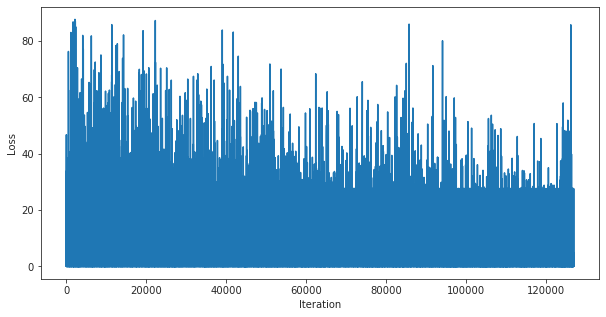

In [9]:
config = CONFIG_MODELS['TransformSinkhornPRModel']

transform = transforms.Compose([Normalize(), ToTensor()])
dataset = TACDatasetClassification(BASE_DATA_DIR, EMBEDDINGS_DIR, DATASET_ID_TRAIN, tuples_train_classification)
data_loader = DataLoader(dataset, batch_size=config['batch_size'], collate_fn=lambda x: x)

transform_sinkhorn_pr_model = TransformSinkhornPRModel(config).to(device=cuda)

criterion = nn.BCELoss()
optimizer = optim.SGD(transform_sinkhorn_pr_model.parameters(), lr=config['learning_rate'])

loss = []

for batch in data_loader:
    
    for sample in batch:
        (d, s1, s2), y = transform(sample)
        
        y_hat = transform_sinkhorn_pr_model(d.to(device=cuda),
                                            s1.to(device=cuda),
                                            s2.to(device=cuda))
        
        L = criterion(y_hat, y.to(device=cuda))
        
        L.backward()
        
        loss.append(L.item())
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    print(f'Train Loss: {loss[-1]:.4f}')

transform_sinkhorn_pr_model.save('transform_sinkhorn_pr_model.pt')

n = config['batch_size']
loss = [sum(loss[i:i+n])/n for i in range(0,len(loss),n)]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plot_loss(ax, loss)
plt.show()

In [ ]:
config = CONFIG_MODELS['NeuralNetSinkhornPRModel']

transform = transforms.Compose([Normalize(), ToTensor()])
dataset = TACDatasetClassification(BASE_DATA_DIR, EMBEDDINGS_DIR, DATASET_ID_TRAIN, tuples_train_classification)
data_loader = DataLoader(dataset, batch_size=config['batch_size'], collate_fn=lambda x: x)

neural_net_sinkhorn_pr_model = NeuralNetSinkhornPRModel(config).to(device=cuda)

criterion = nn.BCELoss()
optimizer = optim.Adam(neural_net_sinkhorn_pr_model.parameters(), lr=config['learning_rate'])

loss = []

for batch in data_loader:
    
    for sample in batch:
        (d, s1, s2), y = transform(sample)
        
        y_hat = neural_net_sinkhorn_pr_model(d.to(device=cuda),
                                             s1.to(device=cuda),
                                             s2.to(device=cuda))
        
        L = criterion(y_hat, y.to(device=cuda))
        
        L.backward()
        
        loss.append(L.item())
        
    optimizer.step()
    
    optimizer.zero_grad()
    
    print(f'{loss[-1]:.4f}')

neural_net_sinkhorn_pr_model.save('neural_net_sinkhorn_pr_model.pt')

n = config['batch_size']
loss = [sum(loss[i:i+n])/n for i in range(0,len(loss),n)]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plot_loss(ax, loss)
plt.show()

0.6924
0.6934
0.6965
0.6894
0.6406
0.7213
0.6958
0.6775
0.6289
0.7862
0.6715
0.6060
0.5080
0.7469
0.6727
0.7420
0.5507
0.5924
0.1673
0.7714
0.3443
0.5557
0.0608
0.5152
0.6196
0.2756
0.5135
0.9978
0.7376
0.1295
0.6931
0.5359
0.4090
0.3481
0.2921
0.3930
0.4033
0.5842
0.5009
0.1516
0.5038
0.4386
0.6030
0.8651
0.2159
0.3972
0.8491
0.4627
0.0807
0.7329
0.2894
1.2134
0.8140
0.8131
0.8613
0.5625
0.5686
0.5168
1.1267
1.0975
0.5200
0.0826
0.6904
0.2123
0.8206
0.1242
0.0897
0.5967
0.6187
0.3590
0.3026
0.6270
0.0260
0.4523
0.1786
0.6710
0.0005
0.1632
0.2430
0.3011
0.7054
0.6531
0.8222
0.3800
1.6382
0.3030
0.3493
0.4316
0.1121
0.8769
0.3617
0.9173
0.2792
1.0386
1.0830
1.2337
1.1850
0.2316
0.4155
0.5879
0.3178
0.1654
0.0719
0.6467
0.2037
0.0772
0.9883
0.3027
0.4807
0.4275
0.2042
3.3143
1.1843
0.1843
0.7871
0.4997
0.0009
0.2141
0.1559
1.0308
0.1296
0.2277
0.7052
0.0558
0.2403
0.0162
0.0168
0.9156
0.6064
0.2805
0.5964
0.4422
0.1930
0.4400
0.4675
0.4036
0.6838
0.0149
1.1437
1.1294
0.6426
0.2025
0.5037

Train Loss: 0.610487
Train Loss: 0.652655
Train Loss: 0.596007
Train Loss: 0.720684
Train Loss: 0.693901
Train Loss: 0.600038
Train Loss: 0.629797
Train Loss: 0.842802
Train Loss: 0.911343
Train Loss: 0.677394
Train Loss: 0.524346
Train Loss: 0.968464
Train Loss: 0.594893
Train Loss: 0.638874
Train Loss: 0.600763
Train Loss: 0.693610
Train Loss: 0.623731
Train Loss: 0.771990
Train Loss: 0.645862
Train Loss: 0.721404
Train Loss: 0.617681
Train Loss: 0.728795
Train Loss: 0.695551
Train Loss: 0.645824
Train Loss: 0.623006
Train Loss: 0.667699
Train Loss: 0.895075
Train Loss: 0.661467
Train Loss: 0.801924
Train Loss: 0.685834
Train Loss: 0.721177
Train Loss: 0.793704
Train Loss: 0.696864
Train Loss: 0.709371
Train Loss: 0.587841
Train Loss: 0.592738
Train Loss: 0.854100
Train Loss: 0.517641
Train Loss: 0.567865
Train Loss: 0.391559
Train Loss: 0.815562
Train Loss: 0.728357
Train Loss: 0.595920
Train Loss: 0.586864
Train Loss: 0.682634
Train Loss: 0.500554
Train Loss: 0.701677
Train Loss: 0

Train Loss: 0.864091
Train Loss: 0.519584
Train Loss: 0.184435
Train Loss: 0.439221
Train Loss: 0.750082
Train Loss: 0.538752
Train Loss: 1.272272
Train Loss: 0.452809
Train Loss: 0.302594
Train Loss: 0.650583
Train Loss: 0.623120
Train Loss: 0.487091
Train Loss: 1.170379
Train Loss: 0.399514
Train Loss: 0.983847
Train Loss: 0.849355
Train Loss: 0.333660
Train Loss: 0.409857
Train Loss: 0.219823
Train Loss: 0.765382
Train Loss: 0.171420
Train Loss: 0.722286
Train Loss: 1.340778
Train Loss: 0.610258
Train Loss: 0.397457
Train Loss: 0.307539
Train Loss: 0.618906
Train Loss: 0.030039
Train Loss: 0.288637
Train Loss: 1.084680
Train Loss: 1.163974
Train Loss: 0.399552
Train Loss: 0.594283
Train Loss: 0.464401
Train Loss: 0.431449
Train Loss: 1.097208
Train Loss: 0.414179
Train Loss: 1.096965
Train Loss: 0.393538
Train Loss: 1.381334
Train Loss: 0.367217
Train Loss: 0.410574
Train Loss: 0.478616
Train Loss: 0.318238
Train Loss: 1.474470
Train Loss: 0.195046
Train Loss: 0.428394
Train Loss: 0

Train Loss: 0.651462
Train Loss: 0.453349
Train Loss: 0.125539
Train Loss: 0.364394
Train Loss: 0.150365
Train Loss: 1.586457
Train Loss: 0.278905
Train Loss: 0.275915
Train Loss: 0.425688
Train Loss: 1.050108
Train Loss: 0.990733
Train Loss: 0.134634
Train Loss: 0.131358
Train Loss: 0.536722
Train Loss: 0.158382
Train Loss: 0.209208
Train Loss: 0.770107
Train Loss: 0.389974
Train Loss: 0.226867
Train Loss: 0.641342
Train Loss: 0.617829
Train Loss: 0.052960
Train Loss: 1.456589
Train Loss: 0.251366
Train Loss: 0.829346
Train Loss: 0.481801
Train Loss: 1.095668
Train Loss: 0.088680
Train Loss: 0.813657
Train Loss: 0.462645
Train Loss: 0.934756
Train Loss: 0.197783
Train Loss: 0.254684
Train Loss: 0.328777
Train Loss: 0.893183
Train Loss: 0.372325
Train Loss: 1.963152
Train Loss: 0.081101
Train Loss: 0.662371
Train Loss: 0.327240
Train Loss: 0.408439
Train Loss: 0.665638
Train Loss: 0.901519
Train Loss: 0.600995
Train Loss: 0.080050
Train Loss: 0.335189
Train Loss: 0.010519
Train Loss: 0

Train Loss: 0.803729
Train Loss: 0.864917
Train Loss: 0.494943
Train Loss: 0.186212
Train Loss: 0.939533
Train Loss: 0.544075
Train Loss: 0.806251
Train Loss: 0.021845
Train Loss: 0.489194
Train Loss: 0.221467
Train Loss: 0.280686
Train Loss: 0.158610
Train Loss: 1.685754
Train Loss: 0.233545
Train Loss: 0.436350
Train Loss: 0.909733
Train Loss: 1.178019
Train Loss: 0.982631
Train Loss: 0.693147
Train Loss: 0.841923
Train Loss: 0.875050
Train Loss: 0.100376
Train Loss: 0.458986
Train Loss: 0.727818
Train Loss: 0.360681
Train Loss: 0.882471
Train Loss: 0.453853
Train Loss: 0.690980
Train Loss: 0.260065
Train Loss: 0.387336
Train Loss: 0.071618
Train Loss: 0.670168
Train Loss: 0.607838
Train Loss: 0.156702
Train Loss: 0.354219
Train Loss: 0.450716
Train Loss: 0.105885
Train Loss: 0.811737
Train Loss: 0.687665
Train Loss: 0.161349
Train Loss: 0.115829
Train Loss: 1.019825
Train Loss: 0.063816
Train Loss: 0.145719
Train Loss: 0.330622
Train Loss: 1.200460
Train Loss: 0.590072
Train Loss: 1

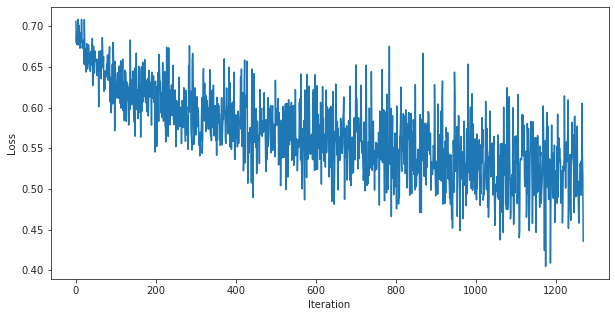

In [6]:
config = CONFIG_MODELS['NeuralNetScoringPRModel']

transform = transforms.Compose([ToTensor()])
dataset = TACDatasetClassification(BASE_DATA_DIR, EMBEDDINGS_DIR, DATASET_ID_TRAIN, tuples_train_classification)
data_loader = DataLoader(dataset, batch_size=config['batch_size'], collate_fn=lambda x: x)

neural_net_scoring_pr_model = NeuralNetScoringPRModel(config).to(device=cuda)

criterion = nn.BCELoss()
optimizer = optim.SGD(neural_net_scoring_pr_model.parameters(), lr=config['learning_rate'])

loss = []

for batch in data_loader:

    for sample in batch:
        (d, s1, s2), y = transform(sample)
        
        y_hat = neural_net_scoring_pr_model(d.to(device=cuda),
                                            s1.to(device=cuda),
                                            s2.to(device=cuda))
        
        L = criterion(y_hat, y.to(device=cuda))
        
        L.backward()
        
        loss.append(L.item())
        
    optimizer.step()

    optimizer.zero_grad()

    print(f'Train Loss: {loss[-1]:4f}')

neural_net_scoring_pr_model.save('neural_net_scoring_pr_model.pt')

n = config['batch_size']
loss = [sum(loss[i:i+n])/n for i in range(0,len(loss),n)]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plot_loss(ax, loss)
plt.show()

D0841
D0804
D0802
D0809
D0819
D0825
D0828
D0826
D0843
D0829
D0813
D0807
D0812
D0820
D0835
D0823
D0847
D0848
D0810
D0822
D0845
D0844
D0839
D0814
D0824
D0821
D0827
D0846
D0818
D0834
D0805
D0817
D0831
D0815
D0836
D0806
D0808
D0837
D0803
D0830
D0838
D0840
D0842
D0832
D0816
D0801
D0833
D0811
D0841
D0804
D0802
D0809
D0819
D0825
D0828
D0826
D0843
D0829
D0813
D0807
D0812
D0820
D0835
D0823
D0847
D0848
D0810
D0822
D0845
D0844
D0839
D0814
D0824
D0821
D0827
D0846
D0818
D0834
D0805
D0817
D0831
D0815
D0836
D0806
D0808
D0837
D0803
D0830
D0838
D0840
D0842
D0832
D0816
D0801
D0833
D0811


IndexError: list index out of range

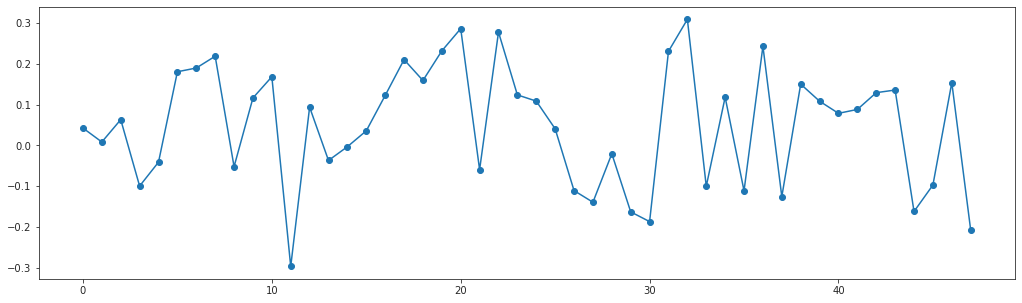

In [7]:
def experiment(model, data):
    document_embs, summary_embs, indices, pyr_scores, summ_ids = data
    document_embs = torch.tensor(document_embs, dtype=torch.float).to(device=cuda)
    metric = lambda i: model.predict(document_embs,
                                     torch.tensor(summary_embs[i[0]:i[1]], dtype=torch.float).to(device=cuda))
    return kendalltau(pyr_scores, np.array([metric(i) for i in indices]))[0]

def execute_experiment(model, experiment):
    scores = []
    with torch.no_grad():
        for topic_id in TOPIC_IDS[DATASET_ID_TRAIN]:
            print(topic_id)
            topic = load_data(os.path.join(EMBEDDINGS_DIR, DATASET_ID_TRAIN), topic_id, encoded=True)
            data = extract(topic)
            scores.append(experiment(model, data))
    return np.array(scores)

models = [
    TransformSinkhornRegModel.load('transform_sinkhorn_reg_model.pt', CONFIG_MODELS['TransformSinkhornRegModel']).to(device=cuda),
    TransformSinkhornPRModel.load('transform_sinkhorn_pr_model.pt', CONFIG_MODELS['TransformSinkhornPRModel']).to(device=cuda),
    NeuralNetSinkhornPRModel.load('neural_net_sinkhorn_pr_model.pt', CONFIG_MODELS['NeuralNetSinkhornPRModel']).to(device=cuda),
    NeuralNetScoringPRModel.load('neural_net_scoring_pr_model.pt', CONFIG_MODELS['NeuralNetScoringPRModel']).to(device=cuda)
]

scores = [
    execute_experiment(models[0], experiment),
    execute_experiment(models[1], experiment),
    execute_experiment(models[2], experiment),
    execute_experiment(models[3], experiment),
]

topic_ids = TOPIC_IDS[DATASET_ID_TRAIN]
x = np.arange(len(topic_ids))
fig = plt.figure(figsize=(17.5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x, -scores[0], '-o', label=f'Model 1: {np.mean(-scores[0]):.2f}')
ax.plot(x, -scores[1], '-s', label=f'Model 2: {np.mean(-scores[1]):.2f}')
ax.plot(x, -scores[2], '-^', label=f'Model 3: {np.mean(-scores[2]):.2f}')
ax.plot(x, scores[3], '-x', label=f'Model 4: {np.mean(scores[3]):.2f}')
ax.hlines(0.5, x[0], x[-1], linestyle='dashed', color='gray')
ax.set_xticks(x)
ax.set_xticklabels(topic_ids, rotation=45)
ax.set_xlabel('Topic')
ax.set_ylabel('Kendall tau')
ax.legend(loc='upper right')
fig.savefig(os.path.join(PLOTS_DIR, f'models_correlation.png'), dpi=fig.dpi, bbox_inches='tight')

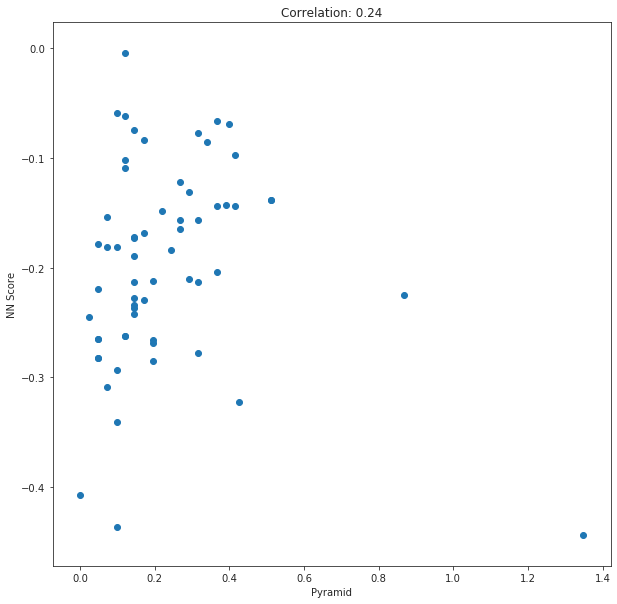

In [15]:
topic = load_data(os.path.join(EMBEDDINGS_DIR, DATASET_ID_TRAIN), TOPIC_IDS[DATASET_ID_TRAIN][0], encoded=True)
document_embs, summary_embs, indices, pyr_scores, _ = extract(topic)

m = np.argsort(-np.array(pyr_scores))

x, y = np.array(pyr_scores)[m], []

d = torch.tensor(document_embs, dtype=torch.float).to(device=cuda)

for i in np.array(indices)[m]:
    s = torch.tensor(summary_embs[i[0]:i[1]], dtype=torch.float).to(device=cuda)
    
    y.append(models[3].predict(d, s).cpu().data.numpy())

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y)
ax.set_title(f'Correlation: {kendalltau(x, y)[0]:.2f}')
ax.set_xlabel('Pyramid')
ax.set_ylabel('NN Score')
plt.show()

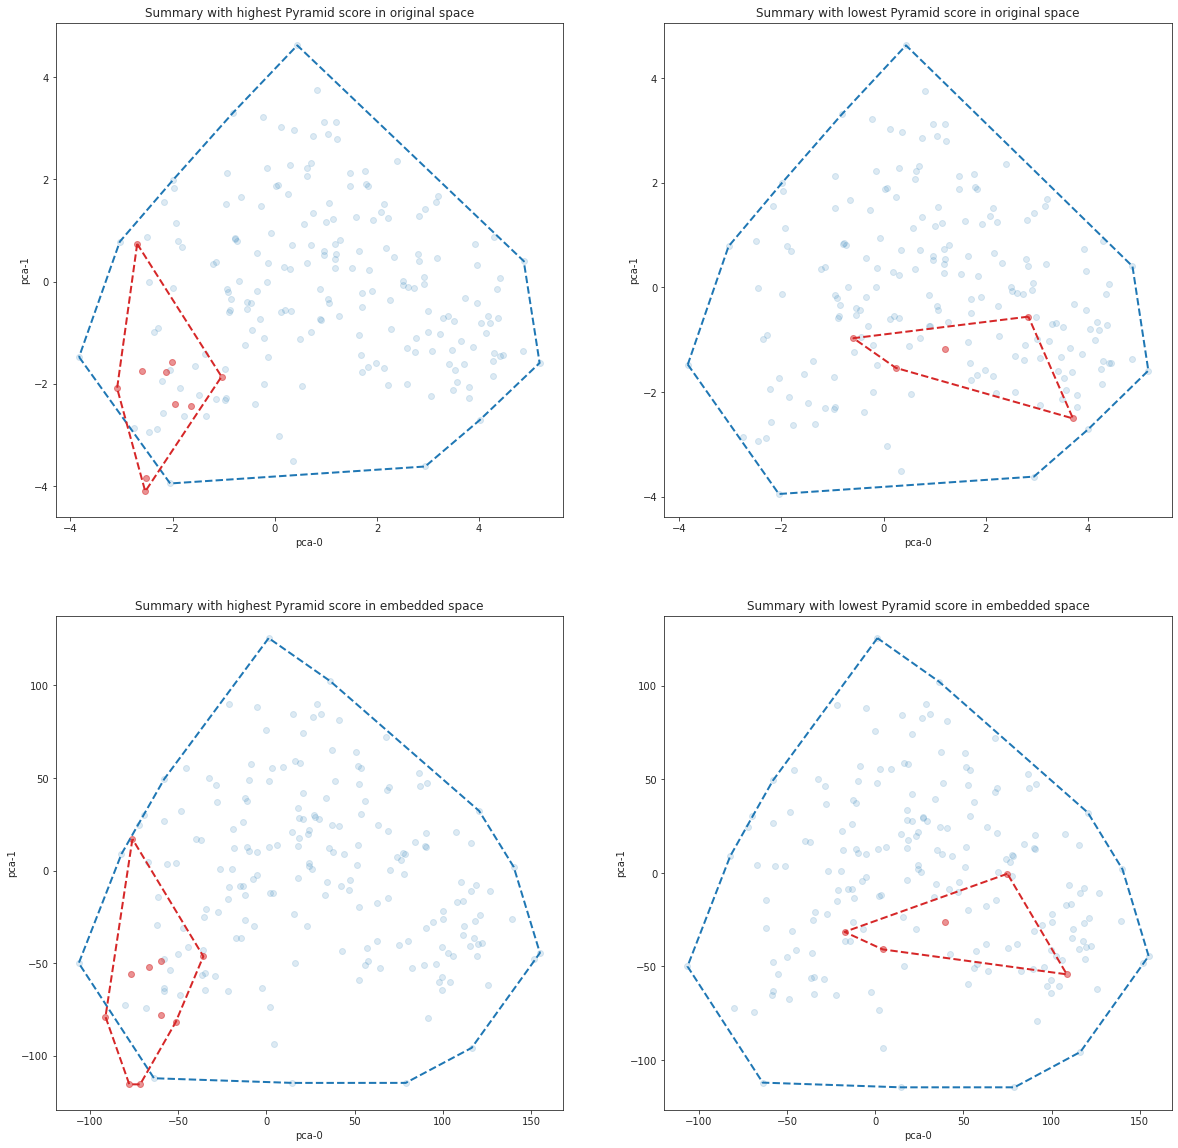

In [32]:
topic = load_data(os.path.join(EMBEDDINGS_DIR, DATASET_ID_TRAIN), TOPIC_IDS[DATASET_ID_TRAIN][0], encoded=True)
document_embs, summary_embs, indices, pyr_scores, _ = extract(topic)

m = np.argsort(-np.array(pyr_scores))

b, w = 0, -1

fig = plt.figure(figsize=(20,20))

document_pts, summary_pts = project_pca(np.concatenate((document_embs, summary_embs)), len(document_embs))

ax1 = fig.add_subplot(2,2,1)
plot_hull(ax1, 'Summary with highest Pyramid score in original space', 'pca', document_pts, summary_pts[indices[m[b]][0]:indices[m[b]][1]])
ax2 = fig.add_subplot(2,2,2)
plot_hull(ax2, 'Summary with lowest Pyramid score in original space', 'pca', document_pts, summary_pts[indices[m[w]][0]:indices[m[w]][1]])

d = torch.tensor(document_embs, dtype=torch.float).to(device=cuda)
s = torch.tensor(summary_embs, dtype=torch.float).to(device=cuda)

document_pts, summary_pts = project_pca(np.concatenate((models[1].transform(d).cpu().data.numpy(),
                                                        models[1].transform(s).cpu().data.numpy())), len(document_embs))

ax3 = fig.add_subplot(2,2,3)
plot_hull(ax3, 'Summary with highest Pyramid score in embedded space', 'pca', document_pts, summary_pts[indices[m[b]][0]:indices[m[b]][1]])
ax4 = fig.add_subplot(2,2,4)
plot_hull(ax4, 'Summary with lowest Pyramid score in embedded space', 'pca', document_pts, summary_pts[indices[m[w]][0]:indices[m[w]][1]])

plt.show()